# Project: Investigating Netflix Movies and Guest Stars in The Office

Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by market capitalization, boasting over 200 million subscribers as of January 2021.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex our data manipulation skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. For their first order of business, they have been performing some analyses, and they believe that the average duration of movies has been declining.

As evidence of this, they have provided us with the following information. For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.

If we're going to be working with this data, we know a good place to start would be to probably start working with pandas. But first we'll need to create a DataFrame from scratch. Let's start by creating a Python object covered in Intermediate Python: a dictionary!

---

## Loading data into dictionary

In [5]:
# Create the years and durations lists
years = [year for year in range(2011, 2021)]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# create a dictionary with the two lists
movie_dict = {
    "years" : years,
    "durations" : durations
}

# print movie dictionary
movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

## Creating a DataFrame from a dictionary

In [6]:
# importing libraries
import pandas as pd 

# creating a dataframe from the dictionary 
durations_df = pd.DataFrame(movie_dict)

# print dataframe
durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


## A visual inspection of our data

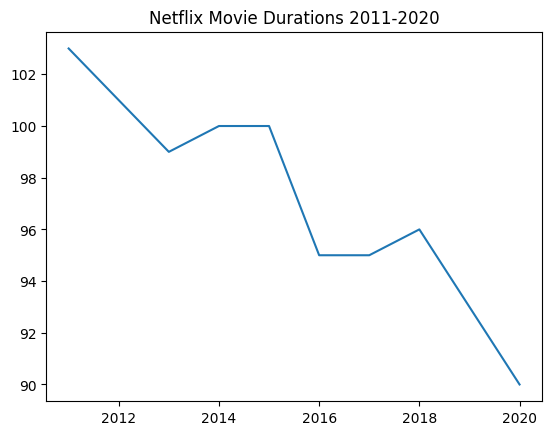

In [10]:
# importing matplotlib 
import matplotlib.pyplot as plt

fig = plt.figure()

# line plot of realease_years and durations
plt.plot(years, durations)
plt.title("Netflix Movie Durations 2011-2020")

plt.show()

## Loading the rest of the data from a CSV

[Kaggle API GitHub](https://github.com/Kaggle/kaggle-api)

In [14]:
import kaggle

In [16]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('shivamb/netflix-shows', path='./', unzip=True)

In [18]:
# reading the rest of the data in 
netflix_df = pd.read_csv("netflix_titles.csv")

# print head
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Filtering for movies

In [43]:
# subsetting the df for type movie
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

# renaming listed_in to genre
netflix_df_movies_only = netflix_df_movies_only.rename(columns={'listed_in' : 'genre'})

# select only the columns of interest
netflix_df_movies_subset = netflix_df_movies_only[['title', 'country', 'genre', 'release_year', 'duration']]

# print head
netflix_df_movies_subset.head(5)

,title,country,genre,release_year,duration
0,Dick Johnson Is Dead,United States,Documentaries,2020,90 min
6,My Little Pony: A New Generation,NaN,Children & Family Movies,2021,91 min
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","Dramas, Independent Movies, International Movies",1993,125 min
9,The Starling,United States,"Comedies, Dramas",2021,104 min
12,Je Suis Karl,"Germany, Czech Republic","Dramas, International Movies",2021,127 min


## Creating a scatterplot

In [44]:
netflix_df_movies_subset.dtypes

title           object
country         object
genre           object
release_year     int64
duration        object
dtype: object

In [45]:
netflix_df_movies_subset_copy = netflix_df_movies_subset.copy()
netflix_df_movies_subset_copy['duration'] = netflix_df_movies_subset_copy['duration'].str.replace(' min', '').astype(float)

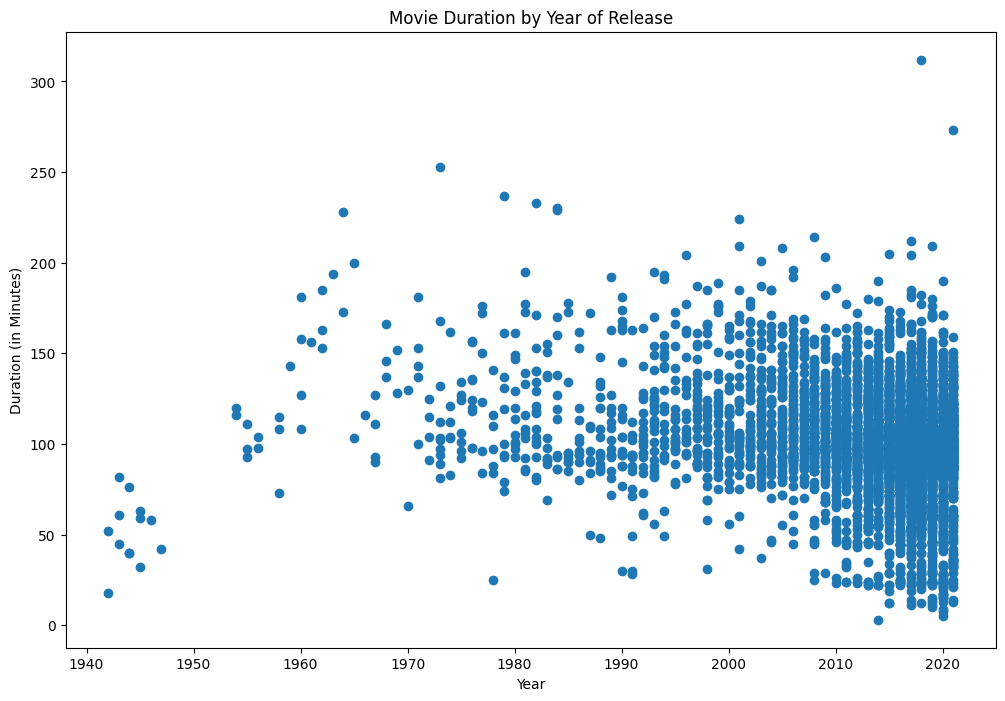

In [50]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_df_movies_subset_copy['release_year'], netflix_df_movies_subset_copy['duration'])

# Create a title
plt.title('Movie Duration by Year of Release')
plt.xlabel("Year")
plt.ylabel("Duration (in Minutes)")

# Show the plot
plt.show()

## Digging Deeper

In [52]:
# filter for durations shorter than 60 minutes
short_movies = netflix_df_movies_subset_copy[netflix_df_movies_subset_copy['duration'] < 60]

short_movies.head(20)

,title,country,genre,release_year,duration
45,My Heroes Were Cowboys,NaN,Documentaries,2021,23.0
71,A StoryBots Space Adventure,NaN,Children & Family Movies,2021,13.0
77,Little Singham - Black Shadow,NaN,"Children & Family Movies, Comedies",2021,48.0
279,Monster Hunter: Legends of the Guild,"United States, Japan","Action & Adventure, Anime Features, Children &...",2021,59.0
470,Bridgerton - The Afterparty,NaN,Movies,2021,39.0
484,Lee Su-geun: The Sense Coach,NaN,Stand-Up Comedy,2021,46.0
495,Awon Boyz,NaN,"Documentaries, International Movies",2019,38.0
560,Audible,NaN,"Documentaries, Sports Movies",2021,39.0
694,Aziza,"Lebanon, Syria","Comedies, Dramas, Independent Movies",2019,13.0
695,Besieged Bread,NaN,"Dramas, International Movies",2015,12.0


## Marking non-feature films

In [53]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for index, row in netflix_df_movies_subset_copy.iterrows():
    if row['genre'] == 'Children':
        colors.append('red')
    elif row['genre'] == 'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-Up':
        colors.append('green')
    else:
        colors.append('black')
        
# Inspect the first 10 values in the list
colors[:10]

['blue',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black']

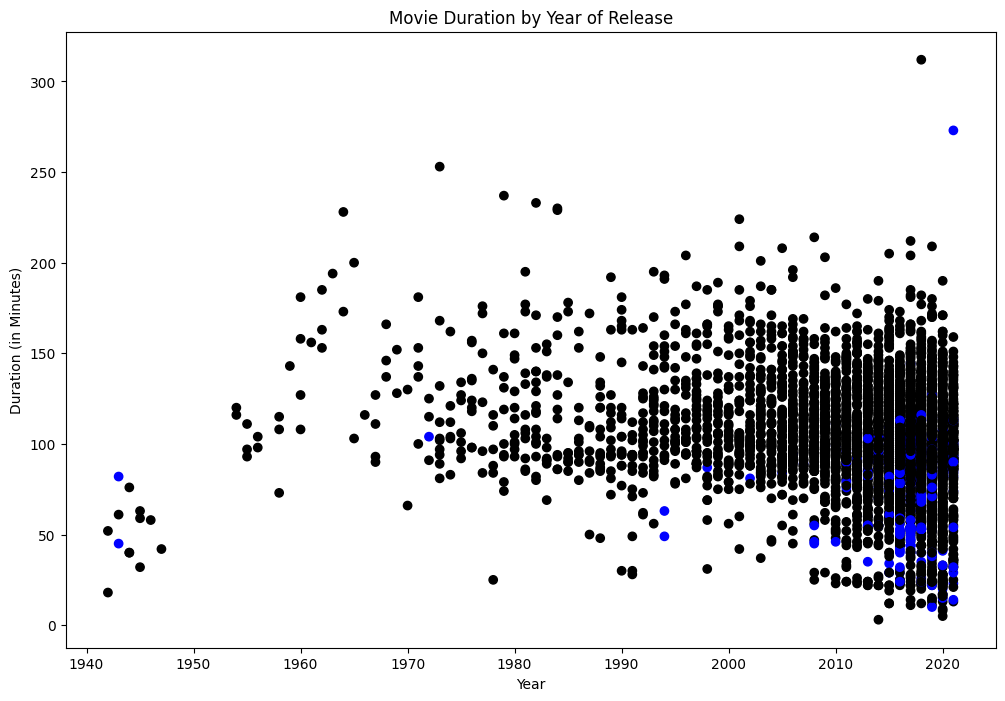

In [54]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_df_movies_subset_copy['release_year'], netflix_df_movies_subset_copy['duration'], color = colors)

# Create a title
plt.title('Movie Duration by Year of Release')
plt.xlabel("Year")
plt.ylabel("Duration (in Minutes)")

# Show the plot
plt.show()

Well, as we suspected, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. But we can't know for certain until we perform additional analyses.

